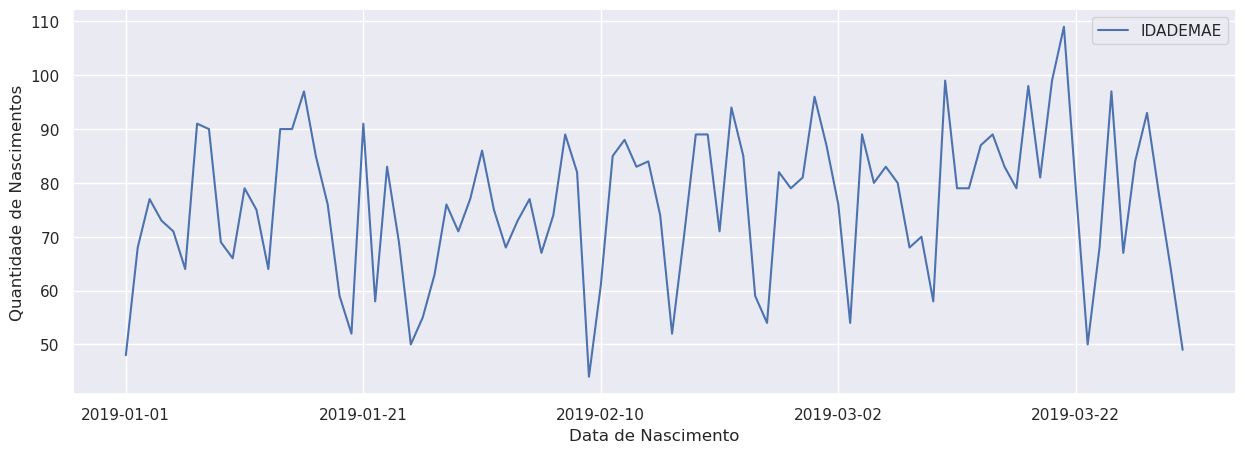

<Figure size 640x480 with 0 Axes>

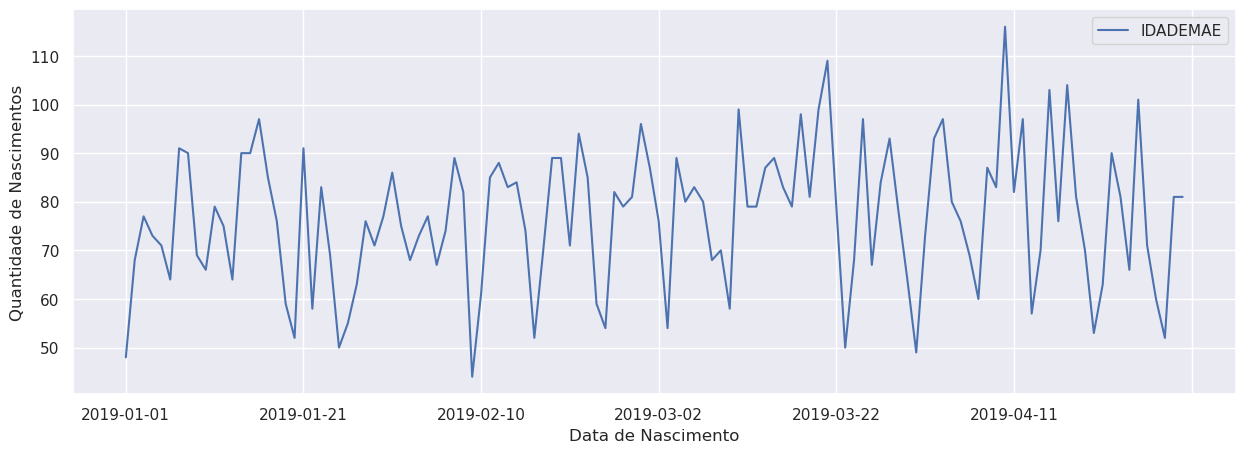

<Figure size 640x480 with 0 Axes>

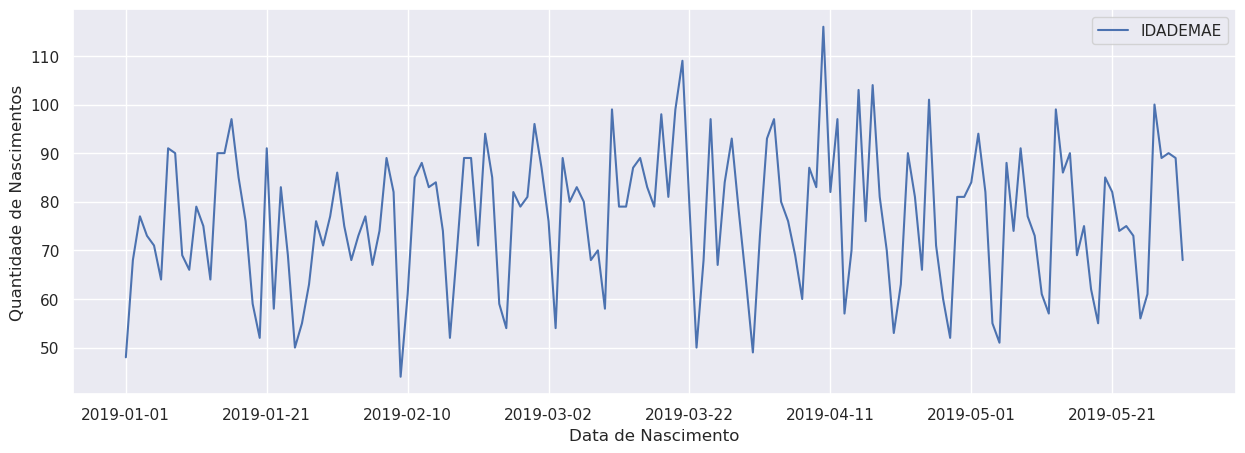

<Figure size 640x480 with 0 Axes>

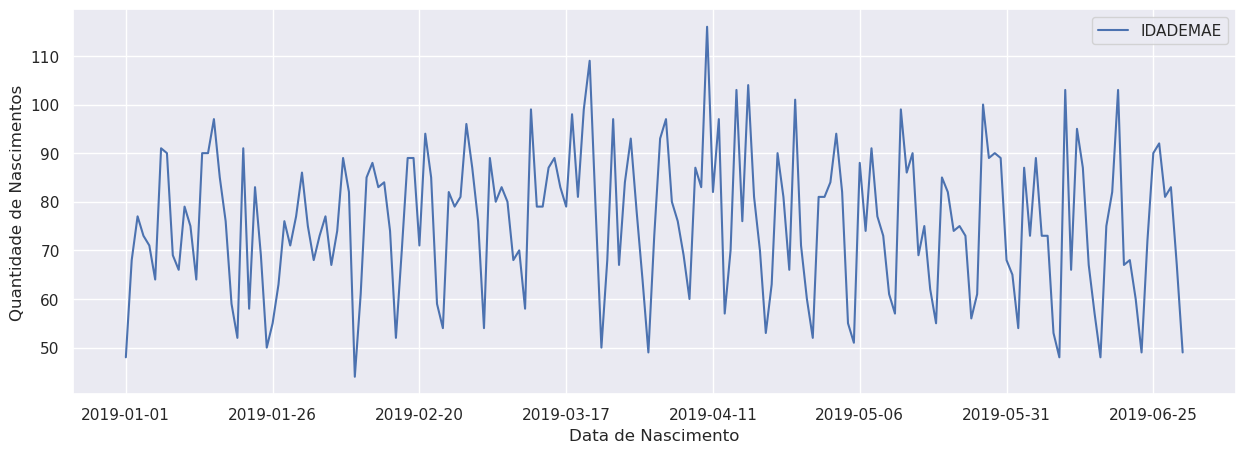

<Figure size 640x480 with 0 Axes>

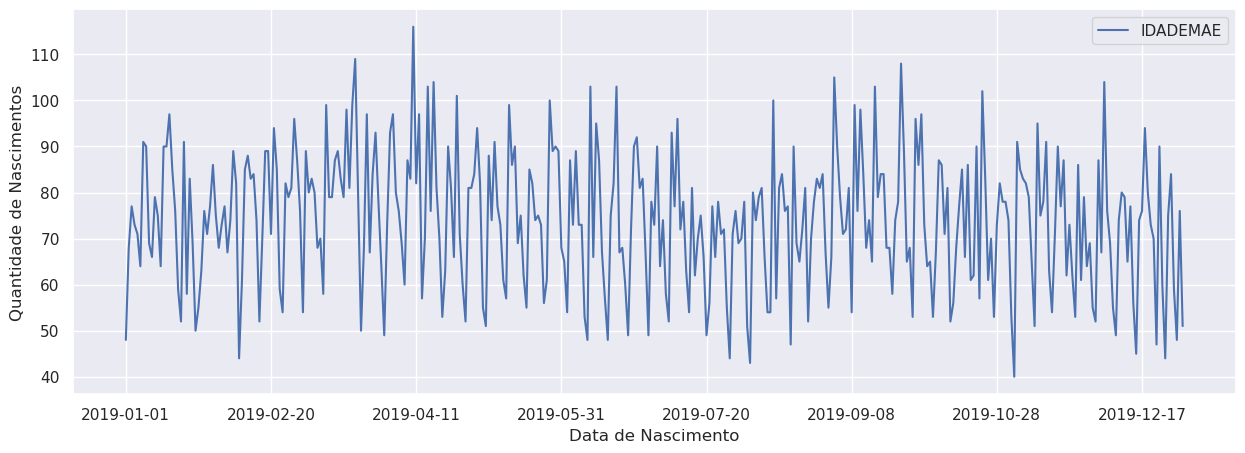

<Figure size 640x480 with 0 Axes>

In [6]:
# Importando bibliotecas necessárias
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações iniciais
sns.set_theme()

# Função para criar gráficos a partir de uma tabela pivot
def plot_pivot_table(df, value, index, func, ylabel, xlabel, option=None):
    pivot = pd.pivot_table(df, values=value, index=index, aggfunc=func)
    if option == 'sort':
        pivot = pivot.sort_values(by=value)
    elif option == 'unstack':
        pivot = pivot.unstack()

    pivot.plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

# Lista de meses a serem analisados
months = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

# Diretório base
base_dir = '/home/adrianoarchlinux/Downloads/Support_Exercise_M14'

# Loop para processar cada mês
for month in months:
    # Caminho para o arquivo de dados do mês
    data_file = f'{base_dir}/SINASC_RO_2019_{month}.csv'
    
    # Carrega os dados
    sinasc = pd.read_csv(data_file)
    
    # Cria diretório de saída para os gráficos se não existir
    output_dir = f'./output/figs/{month}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Exemplo de gráfico: Quantidade de nascimentos por dia
    plot_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'Quantidade de Nascimentos', 'Data de Nascimento')
    
    # Salva o gráfico
    plt.savefig(f'{output_dir}/quantidade_nascimentos_{month}.png')
    
    # Você pode adicionar mais gráficos aqui seguindo a mesma lógica


# Explicação e código para automatizar futuras análises

# 1. Função Generalizada para Carga de Dados
def carregar_dados(ano, mes):
    """
    Carrega dados de um arquivo CSV específico para o ano e mês fornecidos.
    """
    caminho_arquivo = f'{base_dir}/SINASC_RO_{ano}_{mes}.csv'
    return pd.read_csv(caminho_arquivo)

# 2. Função Generalizada para Salvar Gráficos
def salvar_grafico(fig, ano, mes, nome_grafico):
    """
    Salva o gráfico em um diretório específico baseado no ano e mês.
    """
    dir_saida = f'./output/figs/{ano}/{mes}'
    os.makedirs(dir_saida, exist_ok=True)
    fig.savefig(f'{dir_saida}/{nome_grafico}.png')

# 3. Função para Automatizar a Geração de Múltiplos Gráficos
def gerar_graficos(ano, meses):
    """
    Gera e salva vários gráficos para uma lista de meses em um determinado ano.
    """
    for mes in meses:
        df = carregar_dados(ano, mes)
        # Adicione aqui mais gráficos conforme necessário
        fig, ax = plt.subplots()
        plot_pivot_table(df, 'IDADEMAE', 'DTNASC', 'count', 'Quantidade de Nascimentos', 'Data de Nascimento', ax=ax)
        salvar_grafico(fig, ano, mes, 'quantidade_nascimentos')

# 4. Automatização para Anos Futuros
# Defina os anos e meses que deseja analisar
anos = [2019, 2020, 2021]
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

# Loop sobre cada ano e mês para gerar gráficos
for ano in anos:
    gerar_graficos(ano, meses)

# Observações Finais
# Este script agora pode ser facilmente ajustado para incluir novos anos ou meses, apenas adicionando-os às listas 'anos' e 'meses'.
# A modularização do código facilita a manutenção e a expansão futura."""
